# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz
#pd.set_option('display.max_rows', 500)

#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/efcm_simple.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
# convert dict type columns to dataframes
for category in ngs_reads:
    if type(ngs_reads[category][0]) is dict:
        ngs_reads[category] = ngs_reads[category].apply(pd.DataFrame)

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'total_sequences', 'percent_gc', 'min_sequence_length',
       'max_sequence_length', 'module_1_status', 'module_2_status',
       'module_3_status', 'module_4_status', 'module_5_status',
       'module_6_status', 'module_7_status', 'module_8_status',
       'module_9_status', 'module_10_status'],
      dtype='object')

#### extract target variable

In [6]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,total_sequences,percent_gc,min_sequence_length,max_sequence_length,module_1_status,module_2_status,module_3_status,module_4_status,module_5_status,module_6_status,module_7_status,module_8_status,module_9_status,module_10_status
0,15187,37,35,301,2,1,2,0,2,2,1,2,2,2
1,733019,38,301,301,0,2,2,0,2,2,2,1,2,0
2,269263,38,35,301,1,2,2,0,2,2,1,2,2,2
3,265224,38,35,301,0,1,2,0,2,2,1,2,2,2
4,733019,39,301,301,0,2,2,0,2,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1367226,38,35,251,2,2,2,0,2,2,1,0,1,2
84,1836688,39,35,251,2,2,2,0,2,2,1,0,2,2
85,799870,37,35,251,2,2,2,0,2,2,1,0,1,2
86,1369977,39,35,251,2,2,2,0,2,2,1,0,2,2


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

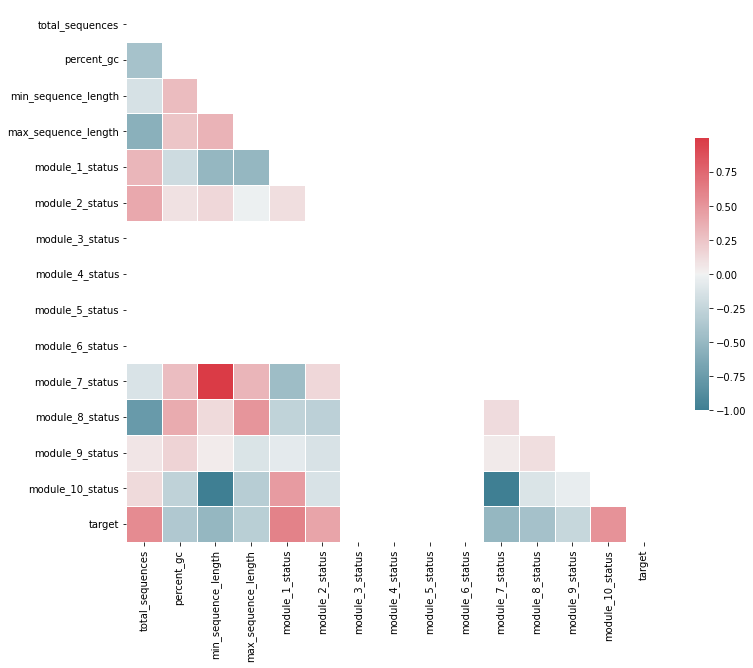

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.68
Recall:  1.0
F1 Score:  0.8095238095238095


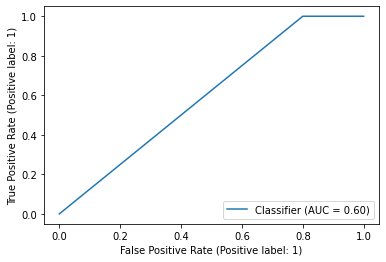

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.94444444 1.         1.         0.76470588 0.64705882]
F1 Scores:  [0.95238095 1.         1.         0.83333333 0.78571429]
Accuracy: 0.87 +/- 0.14
F1 Score: 0.91 +/- 0.09


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Text(0.5416666666666666, 0.9, 'total_sequences <= 771691.0\ngini = 0.477\nsamples = 61\nvalue = [24, 37]\nclass = good'),
 Text(0.3333333333333333, 0.7, 'module_9_status <= 1.5\ngini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = ugly'),
 Text(0.16666666666666666, 0.5, 'module_7_status <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = ugly'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.5, 0.5, 'total_sequences <= 703611.5\ngini = 0.105\nsamples = 18\nvalue = [17, 1]\nclass = ugly'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = ugly'),
 Text(0.5833333333333334, 0.3, 'total_sequences <= 728634.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = ugly'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = ugly'),
 T

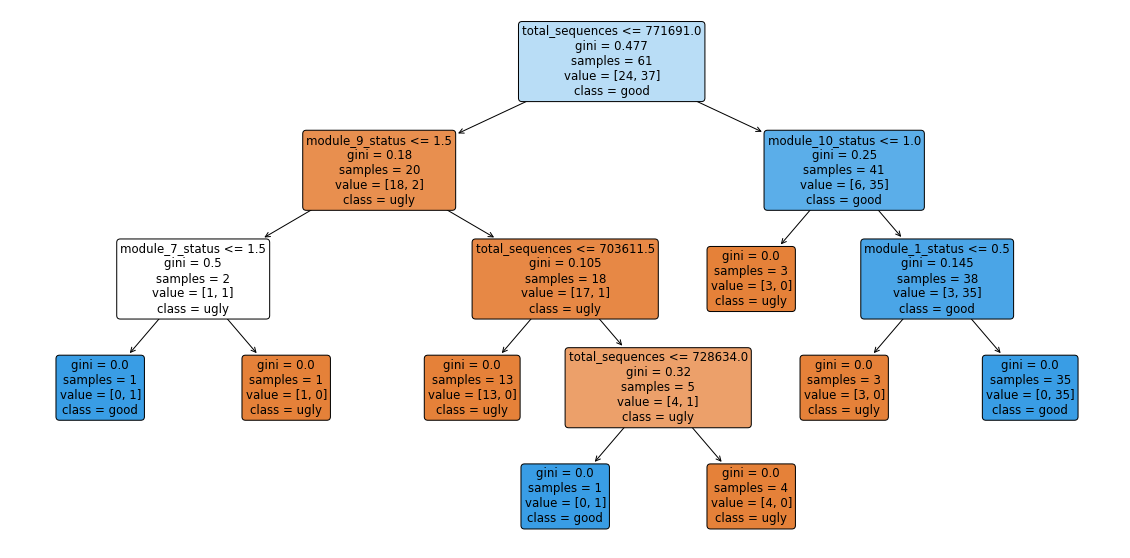

In [17]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Random Forest Training

In [18]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [19]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [20]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


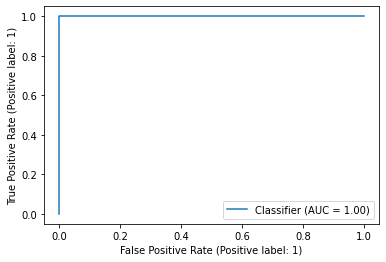

In [21]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

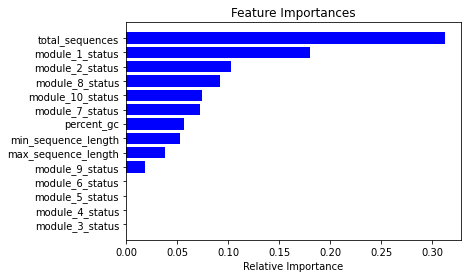

In [22]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [23]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

# higher cv results in most accuracies = 1.0

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [1.         1.         1.         0.94117647 1.        ]
F1 Scores:  [1.         1.         1.         0.95238095 1.        ]
Accuracy: 0.99 +/- 0.02
F1 Score: 0.99 +/- 0.02


#### Visualize some trees of the Random Forest

[Text(0.4, 0.9444444444444444, 'total_sequences <= 771691.0\ngini = 0.484\nsamples = 39\nvalue = [25, 36]\nclass = good'),
 Text(0.2, 0.8333333333333334, 'total_sequences <= 570662.0\ngini = 0.091\nsamples = 13\nvalue = [20, 1]\nclass = ugly'),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 8\nvalue = [11, 0]\nclass = ugly'),
 Text(0.3, 0.7222222222222222, 'total_sequences <= 677445.5\ngini = 0.18\nsamples = 5\nvalue = [9, 1]\nclass = ugly'),
 Text(0.2, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.4, 0.6111111111111112, 'gini = 0.0\nsamples = 4\nvalue = [9, 0]\nclass = ugly'),
 Text(0.6, 0.8333333333333334, 'module_2_status <= 1.5\ngini = 0.219\nsamples = 26\nvalue = [5, 35]\nclass = good'),
 Text(0.5, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = ugly'),
 Text(0.7, 0.7222222222222222, 'total_sequences <= 1693573.5\ngini = 0.145\nsamples = 25\nvalue = [3, 35]\nclass = good'),
 Text(0.6, 0.6111111111111112, 'percent

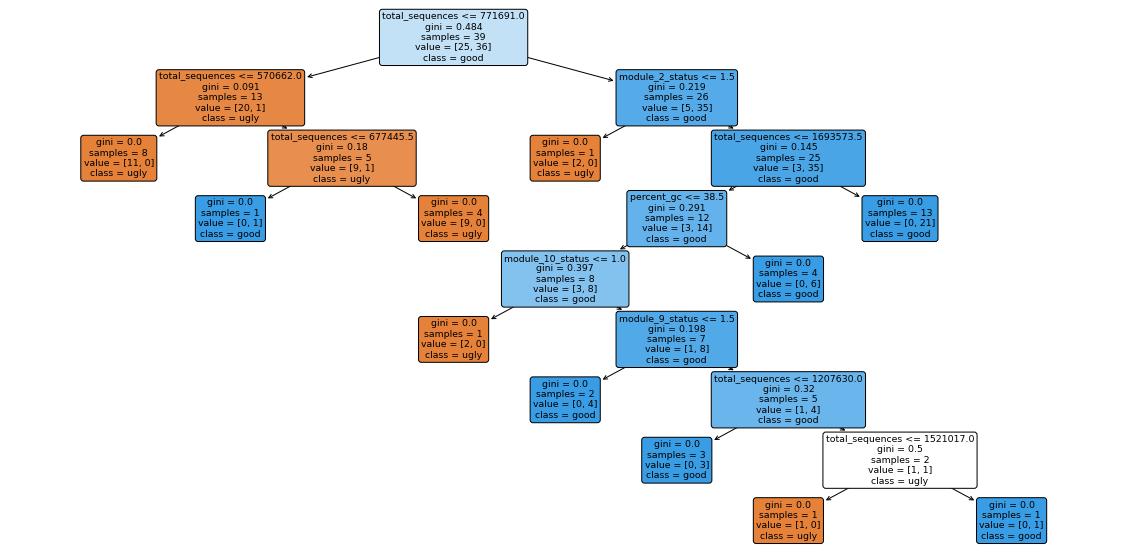

In [24]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.3333333333333333, 0.9166666666666666, 'module_2_status <= 1.5\ngini = 0.489\nsamples = 38\nvalue = [26, 35]\nclass = good'),
 Text(0.2222222222222222, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = ugly'),
 Text(0.4444444444444444, 0.75, 'module_1_status <= 1.5\ngini = 0.469\nsamples = 35\nvalue = [21, 35]\nclass = good'),
 Text(0.2222222222222222, 0.5833333333333334, 'module_10_status <= 1.0\ngini = 0.332\nsamples = 10\nvalue = [15, 4]\nclass = ugly'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]\nclass = ugly'),
 Text(0.3333333333333333, 0.4166666666666667, 'total_sequences <= 589988.5\ngini = 0.391\nsamples = 7\nvalue = [11, 4]\nclass = ugly'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [7, 0]\nclass = ugly'),
 Text(0.4444444444444444, 0.25, 'max_sequence_length <= 276.0\ngini = 0.5\nsamples = 4\nvalue = [4, 4]\nclass = ugly'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nva

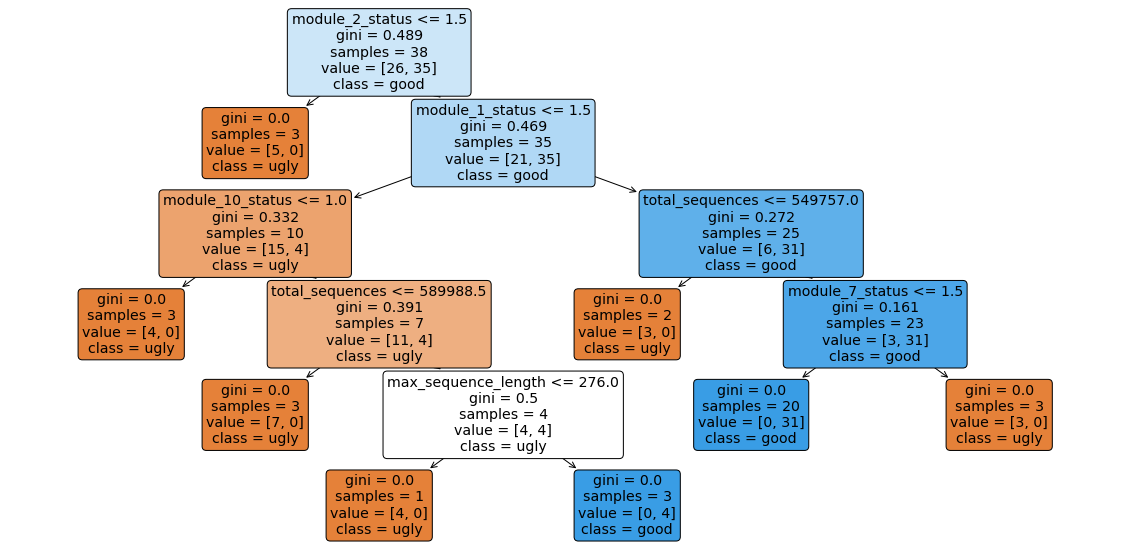

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [27]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision:  0.85
Recall:  1.0
F1 Score:  0.9189189189189189


Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [29]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.68
Recall:  1.0
F1 Score:  0.8095238095238095


K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.7647058823529411
Recall:  0.7647058823529411
F1 Score:  0.7647058823529412
